# Information

## CC2_CAll_min

This code uses:
+ Cleaner_Centroid with 2 points
+ Then uses the centroid to compare distance between all 10 points, and calculates the distance.


In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy import stats  # For mode calculation

In [2]:
def detect_interactions(distances, min_consecutive=40, threshold=150):
    """
    Detect interactions in a sequence of distances.

    Parameters:
        distances (list or numpy array): A sequence of distances.
        min_consecutive (int): Minimum consecutive frames required for an interaction.
        threshold (float): Threshold value to determine an interaction.

    Returns:
        List of tuples where each tuple represents an interaction (start_frame, end_frame).
    """
    interactions = []
    current_start = None

    for i, distance in enumerate(distances):
        if distance < threshold:
            if current_start is None:
                current_start = i
        else:
            if current_start is not None:
                if i - current_start >= min_consecutive:
                    interactions.append((current_start, i - 1))
                current_start = None

    # Check if an interaction is ongoing at the end of the sequence
    if current_start is not None and len(distances) - current_start >= min_consecutive:
        interactions.append((current_start, len(distances) - 1))

    return interactions

In [3]:
directory = r"C:\Users\raulo\Desktop\ze_vids\phase_3\Tracks+Label_Top&Bot"
files = os.listdir(directory)

result_dataframes = {}

for file in files:
    df = pd.read_csv(os.path.join(directory, file))
    
    df["Behavior"].replace({"TS": "interaction", "jolts": "interaction"}, inplace=True)
    #df["Behavior"].replace({"TS": "interaction"}, inplace=True)
    # Create a new DataFrame to store the results
    new_df = pd.DataFrame()

    # Add relevant data to the new DataFrame
    new_df["Behavior"] = df['Behavior']

    new_df['Client_Mouth_X_top'] = df['Client_Mouth']
    new_df['Client_Mouth_Y_top'] = df['Client_Mouth.1']
    new_df['Client_Mouth_Z_front']= df['Client_Mouth_Front.1']

    new_df['Client_S1_X_top'] = df['Client_Spine_1']
    new_df['Client_S1_Y_top'] = df['Client_Spine_1.1']
    new_df['Client_S1_Z_front']= df['Client_Spine_head_Front.1']
    
    new_df['Client_STop1_X_top'] = df['Client_Spine_1']
    new_df['Client_STop1_Y_top'] = df['Client_Spine_1.1']
    new_df['Client_STop1_Z_front']= df['Client_Body_top1_Front.1']
    
    new_df['Client_SBot1_X_top'] = df['Client_Spine_1']
    new_df['Client_SBot1_Y_top'] = df['Client_Spine_1.1']
    new_df['Client_SBot1_Z_front']= df['Client_Body_bot1_Front.1']

    new_df['Client_S2_X_top'] = df['Client_Spine_2']
    new_df['Client_S2_Y_top'] = df['Client_Spine_2.1']
    new_df['Client_S2_Z_front']= df['Client_Spine_mid_Front.1']
    
    new_df['Client_STop2_X_top'] = df['Client_Spine_2']
    new_df['Client_STop2_Y_top'] = df['Client_Spine_2.1']
    new_df['Client_STop2_Z_front']= df['Client_Body_top2_Front.1']
    
    new_df['Client_SBot2_X_top'] = df['Client_Spine_2']
    new_df['Client_SBot2_Y_top'] = df['Client_Spine_2.1']
    new_df['Client_SBot2_Z_front']= df['Client_Body_bot2_Front.1']
    
    new_df['Client_Tail_X_top'] = df['Client_Tail']
    new_df['Client_Tail_Y_top'] = df['Client_Tail.1']
    new_df['Client_Tail_Z_front']= df['Client_Tail_Front.1']
    
    new_df['Client_TailTipTop_X_top'] = df['Client_TailTip']
    new_df['Client_TailTipTop_Y_top'] = df['Client_TailTip.1']
    new_df['Client_TailTipTop_Z_front']= df['Client_Tail_Top_Front.1']

    new_df['Client_TailTipBot_X_top'] = df['Client_TailTip']
    new_df['Client_TailTipBot_Y_top'] = df['Client_TailTip.1']
    new_df['Client_TailTipBot_Z_front']= df['Client_Tail_Bot_Front.1']

    
    
    new_df['Cleaner_Mouth_X_top'] = df['Cleaner_Mouth']
    new_df['Cleaner_Mouth_Y_top'] = df['Cleaner_Mouth.1']
    new_df['Cleaner_Mouth_Z_front']= df['Cleaner_Mouth_Front.1']

    new_df['Cleaner_Spine1_X_top'] = df['Cleaner_Spine1']
    new_df['Cleaner_Spine1_Y_top'] = df['Cleaner_Spine1.1']
    new_df['Cleaner_Spine1_Z_front']= df['Cleaner_Spine1_Front.1']

    

    new_df["Frame"] = df['Frame']
    
    # Create a new column in new_df to store the centroid of the cleaner fish for each row
    new_df['Cleaner_Centroid_X'] = new_df[['Cleaner_Mouth_X_top', 'Cleaner_Spine1_X_top']].mean(axis=1)
    new_df['Cleaner_Centroid_Y'] = new_df[['Cleaner_Mouth_Y_top', 'Cleaner_Spine1_Y_top']].mean(axis=1)
    new_df['Cleaner_Centroid_Z'] = new_df[['Cleaner_Mouth_Z_front', 'Cleaner_Spine1_Z_front']].mean(axis=1)

    # Initialize a column to store the smallest distance for each row
    new_df['Min_Distance'] = np.inf  # Initialize with infinity

    # Loop through client points and calculate distance, updating 'Min_Distance' if a smaller distance is found
    for client_point in ['Client_Mouth', 'Client_S1', 'Client_STop1', 'Client_SBot1', 
                         'Client_S2', 'Client_STop2', 'Client_SBot2', 'Client_Tail', 'Client_TailTipTop', 'Client_TailTipBot']:
        client_x = new_df[f'{client_point}_X_top']
        client_y = new_df[f'{client_point}_Y_top']
        client_z = new_df[f'{client_point}_Z_front']

        distance = np.sqrt(
            (client_x - new_df['Cleaner_Centroid_X'])**2 +
            (client_y - new_df['Cleaner_Centroid_Y'])**2 +
            (client_z - new_df['Cleaner_Centroid_Z'])**2
        )

        new_df['Min_Distance'] = np.minimum(new_df['Min_Distance'], distance)
    
    new_df["Interaction_Predictions"] = "background"  # Initialization of predictions

    result_dataframes[file.split("_")[0]] = new_df

## Histograms

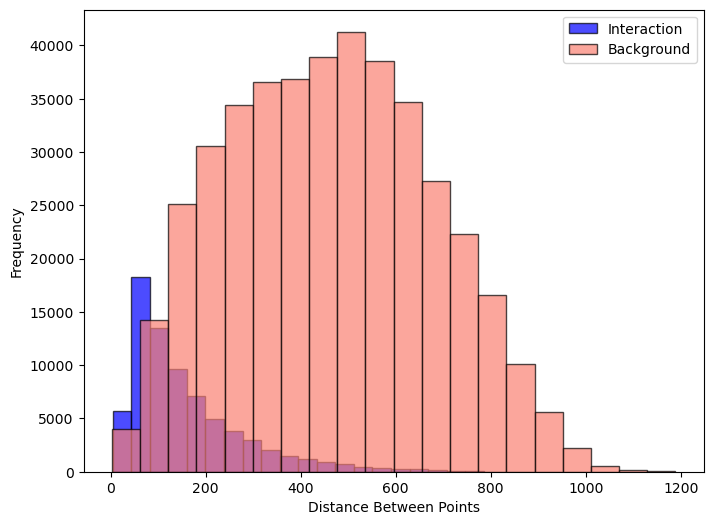

In [28]:
# Concatenate all data frames into one
combined_df = pd.concat(result_dataframes.values())

# Create a figure for the histogram
plt.figure(figsize=(8, 6))

# Plot the histogram for interactions
plt.hist(combined_df[combined_df['Behavior'] == 'interaction']['Min_Distance'], bins=20, edgecolor='black', color='blue', alpha=0.7, label='Interaction')

# Plot the histogram for background behaviors
plt.hist(combined_df[combined_df['Behavior'] == 'Background']['Min_Distance'], bins=20, edgecolor='black', color='salmon', alpha=0.7, label='Background')

# Set labels and title
plt.xlabel('Distance Between Points')
plt.ylabel('Frequency')
plt.title('')
plt.legend()

plt.savefig(r'C:\Users\raulo\Desktop\Faculdade\Mestrado Bioestatística\Tese\Escrita\imagens\histogram_CC2_CAll_min.png')

# Show the plot
plt.show()

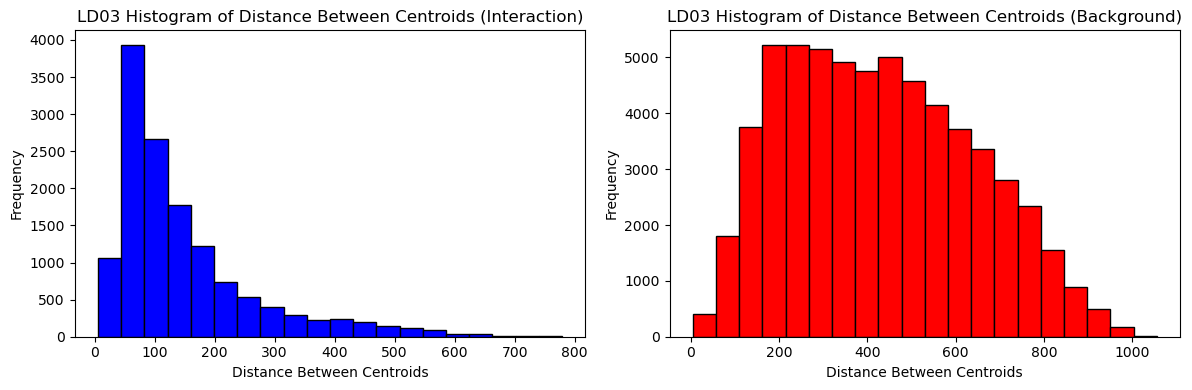

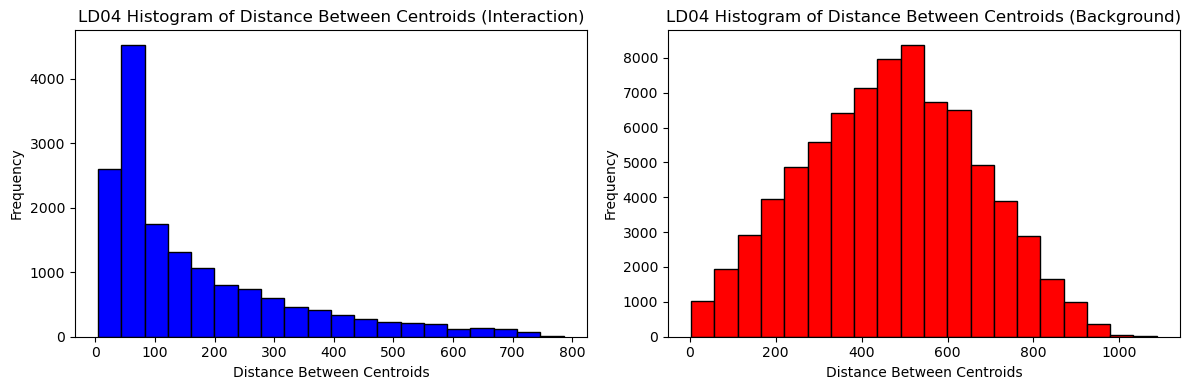

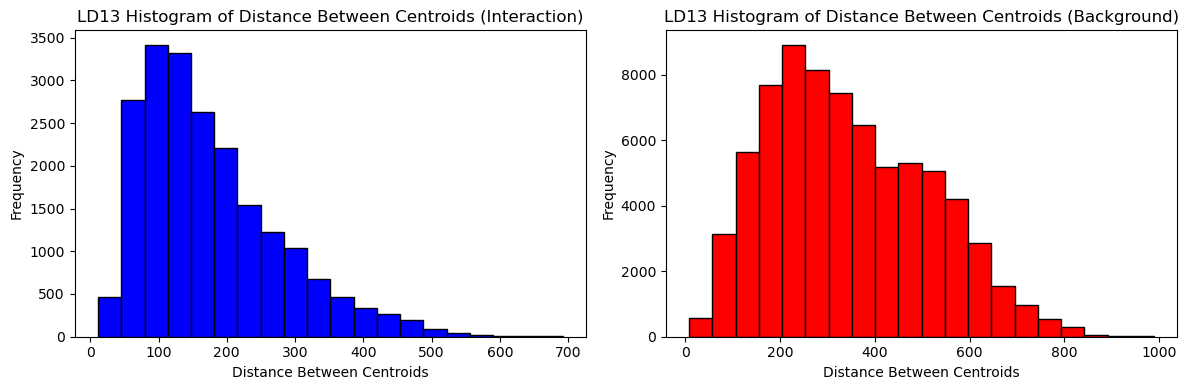

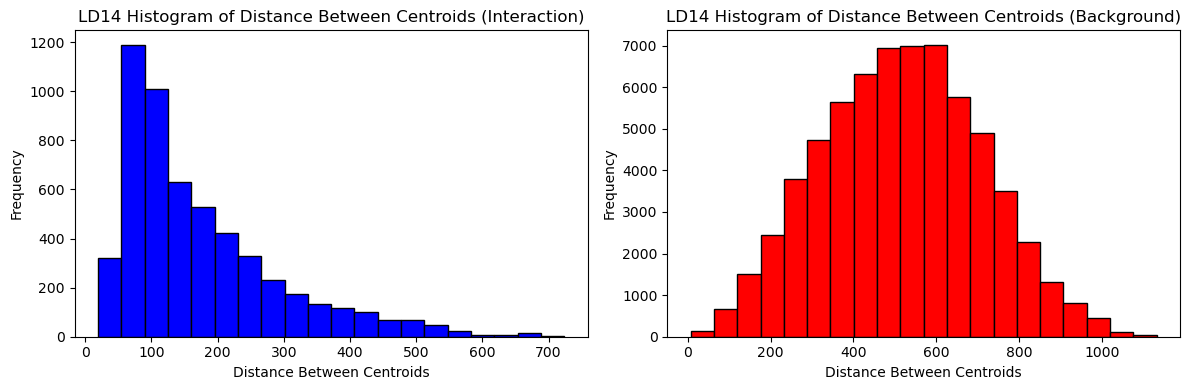

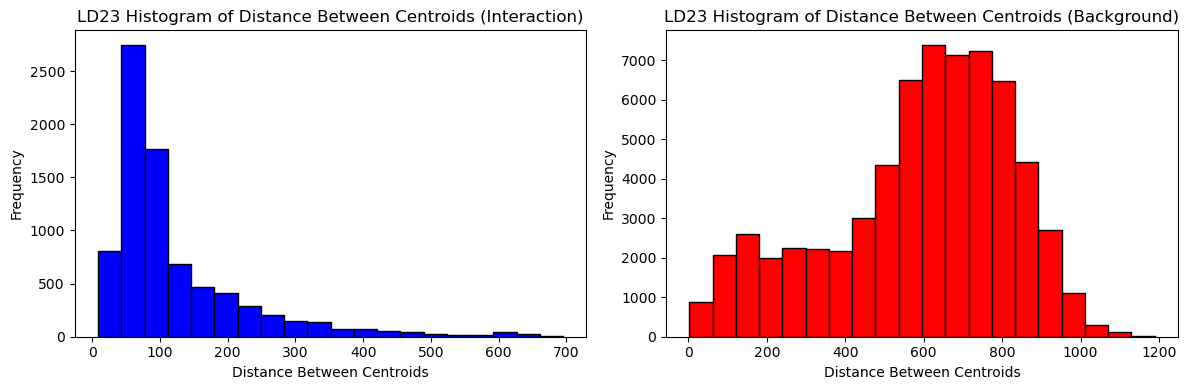

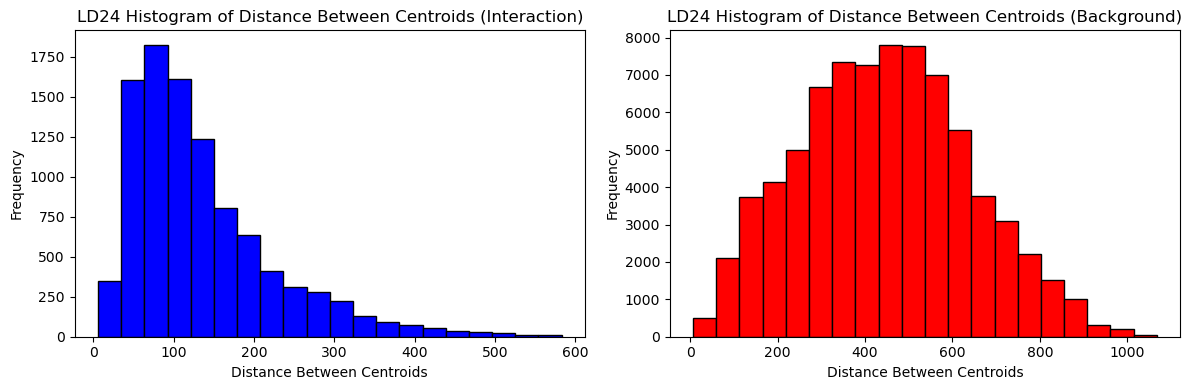

In [29]:
for data_frame in result_dataframes:
    # Create a figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Plot the first histogram (interaction)
    ax1.hist(result_dataframes[data_frame][result_dataframes[data_frame]['Behavior'] == 'interaction']['Min_Distance'], bins=20, edgecolor='black', color='blue')
    ax1.set_xlabel('Distance Between Centroids')
    ax1.set_ylabel('Frequency')
    ax1.set_title(f'{data_frame} Histogram of Distance Between Centroids (Interaction)')

    # Plot the second histogram (non-interaction)
    ax2.hist(result_dataframes[data_frame][result_dataframes[data_frame]['Behavior'] == 'Background']['Min_Distance'], bins=20, edgecolor='black', color='red')
    ax2.set_xlabel('Distance Between Centroids')
    ax2.set_ylabel('Frequency')
    ax2.set_title(f'{data_frame} Histogram of Distance Between Centroids (Background)')

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

In [30]:
# Create a dictionary to store summary values for each DataFrame
summary_values = {}

for data_frame in result_dataframes:
    total_frames = 0
    correctly_detected_event = 0
    total = 0
    correctly_frame_count = 0

    interactions = detect_interactions(result_dataframes[data_frame]["Min_Distance"])

    for interaction in interactions:

        start_frame, end_frame = interaction

        if end_frame - start_frame + 1 >= 15:
            total += 1  # Increment the total count for eligible interactions
            total_frames += end_frame - start_frame + 1
            selected_data = result_dataframes[data_frame].loc[start_frame:end_frame, "Behavior"]
            mode_value = stats.mode(selected_data).mode[0]

            if mode_value == "interaction" or mode_value == "TS":
                correctly_detected_event +=1
                correctly_frame_count += end_frame - start_frame + 1

            # Store the prediction in the new column
            result_dataframes[data_frame].loc[start_frame:end_frame, "Interaction_Predictions"] = mode_value
                  
            # Store the summary values in the summary_values dictionary
            summary_values[data_frame] = {
            "total_frames": total_frames,
            "correctly_detected_event": correctly_detected_event,
            "total": total,
            "correctly_frame_count": correctly_frame_count
            }
            
#             if total == 1:
#                 print(f"\nData from: {data_frame}")            
#             print(f"Interaction detected from frame {start_frame} to {end_frame} (Duration: {end_frame - start_frame + 1} frames) with a true Behavior of {mode_value}")

C:\Users\raulo\AppData\Local\Temp\ipykernel_21664\828851113.py:20: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_value = stats.mode(selected_data).mode[0]
C:\Users\raulo\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
C:\Users\raulo\AppData\Local\Temp\ipykernel_21664\828851113.py:20: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see 

In [31]:
# Define a list of threshold and min_consecutive values to test
threshold_values = [100, 125, 150, 175, 200, 225, 250]  # Add more values if needed
min_consecutive_values = [30, 45, 60]  # Add more values if needed


for threshold in threshold_values:
    for min_consecutive in min_consecutive_values:

        summary_values = {}

        for data_frame_name, data_frame in result_dataframes.items():
            # Initialize variables to keep track of the current group
            current_group = None
            interaction_count = 0

            # Iterate through the "Behavior" column
            for behavior in data_frame["Behavior"]:
                if behavior == "interaction":
                    if current_group != "interaction":
                        # Start of a new interaction group
                        interaction_count += 1
                        current_group = "interaction"
                else:
                    current_group = None  # Reset the group if behavior is not "interaction"

            summary_values[data_frame_name] = {"true interaction count": interaction_count}

            
            # Initialize the summary values with default values
            summary_values[data_frame_name].update({
                "total_frames": 0,
                "correctly_detected_event": 0,
                "total": 0,
                "correctly_frame_count": 0
            })
            
            # Reset the other summary values to zero to avoid overwriting
            total_frames = 0
            correctly_detected_event = 0
            total = 0
            correctly_frame_count = 0

            interactions = detect_interactions(result_dataframes[data_frame_name]["Min_Distance"], min_consecutive, threshold)

            for interaction in interactions:
                start_frame, end_frame = interaction

                if end_frame - start_frame + 1 >= 15:
                    total += 1  # Increment the total count for eligible interactions
                    total_frames += end_frame - start_frame + 1
                    selected_data = result_dataframes[data_frame_name].loc[start_frame:end_frame, "Behavior"]
                    #mode_value = stats.mode(selected_data).mode[0]
                    mode_value = selected_data.mode().iloc[0]
                    
                    if mode_value == "interaction" or mode_value == "TS":
                        correctly_detected_event += 1
                        correctly_frame_count += end_frame - start_frame + 1

                    # Store the prediction in the new column
                    result_dataframes[data_frame_name].loc[start_frame:end_frame, "Interaction_Predictions"] = mode_value

                # Update the existing summary values in the summary_values dictionary
                summary_values[data_frame_name].update({
                "total_frames": total_frames,
                "correctly_detected_event": correctly_detected_event,
                "total": total,
                "correctly_frame_count": correctly_frame_count
                })

        #         if total == 1:
        #             print(f"\nData from: {data_frame_name}")
        #         print(f"Interaction detected from frame {start_frame} to {end_frame} (Duration: {end_frame - start_frame + 1} frames) with a true Behavior of {mode_value}")

        for data_frame, summary in summary_values.items():
            true_interaction_count = summary['true interaction count']
            total_frames = summary['total_frames']
            correctly_frame_count = summary['correctly_frame_count']
            total_detected_events = summary['total']
            correctly_detected_events = summary['correctly_detected_event']

            accuracy = (correctly_frame_count / total_frames) * 100 if total_frames != 0 else 0

            print(f"Data from: {data_frame} with threshold of: {threshold} and min_consecutives of: {min_consecutive}")
            print(f"This data has {true_interaction_count} true events")
            print(f"There were {correctly_frame_count} frames correctly classified, out of a total of {total_frames} frames classified as interaction.")
            print(f"This results in an accuracy of {accuracy:.2f}%.")
            print(f"There were a total of {correctly_detected_events} events detected correctly, out of {total_detected_events} total events detected. ({correctly_detected_events/total_detected_events *100:.2f}%)" 
                 if total_detected_events != 0 else "No events detected.")
            print(f"There was {correctly_detected_events/true_interaction_count * 100:.2f}% events detected")
            print("")

Data from: LD03 with threshold of: 100 and min_consecutives of: 30
This data has 69 true events
There were 5153 frames correctly classified, out of a total of 5845 frames classified as interaction.
This results in an accuracy of 88.16%.
There were a total of 66 events detected correctly, out of 79 total events detected. (83.54%)
There was 95.65% events detected

Data from: LD04 with threshold of: 100 and min_consecutives of: 30
This data has 63 true events
There were 7320 frames correctly classified, out of a total of 8351 frames classified as interaction.
This results in an accuracy of 87.65%.
There were a total of 80 events detected correctly, out of 98 total events detected. (81.63%)
There was 126.98% events detected

Data from: LD13 with threshold of: 100 and min_consecutives of: 30
This data has 81 true events
There were 3685 frames correctly classified, out of a total of 4931 frames classified as interaction.
This results in an accuracy of 74.73%.
There were a total of 72 events 

Data from: LD03 with threshold of: 125 and min_consecutives of: 60
This data has 69 true events
There were 5693 frames correctly classified, out of a total of 6224 frames classified as interaction.
This results in an accuracy of 91.47%.
There were a total of 45 events detected correctly, out of 51 total events detected. (88.24%)
There was 65.22% events detected

Data from: LD04 with threshold of: 125 and min_consecutives of: 60
This data has 63 true events
There were 7542 frames correctly classified, out of a total of 8416 frames classified as interaction.
This results in an accuracy of 89.62%.
There were a total of 55 events detected correctly, out of 66 total events detected. (83.33%)
There was 87.30% events detected

Data from: LD13 with threshold of: 125 and min_consecutives of: 60
This data has 81 true events
There were 3956 frames correctly classified, out of a total of 4849 frames classified as interaction.
This results in an accuracy of 81.58%.
There were a total of 44 events d

Data from: LD03 with threshold of: 175 and min_consecutives of: 30
This data has 69 true events
There were 9962 frames correctly classified, out of a total of 14195 frames classified as interaction.
This results in an accuracy of 70.18%.
There were a total of 78 events detected correctly, out of 150 total events detected. (52.00%)
There was 113.04% events detected

Data from: LD04 with threshold of: 175 and min_consecutives of: 30
This data has 63 true events
There were 10862 frames correctly classified, out of a total of 14043 frames classified as interaction.
This results in an accuracy of 77.35%.
There were a total of 83 events detected correctly, out of 138 total events detected. (60.14%)
There was 131.75% events detected

Data from: LD13 with threshold of: 175 and min_consecutives of: 30
This data has 81 true events
There were 11716 frames correctly classified, out of a total of 20516 frames classified as interaction.
This results in an accuracy of 57.11%.
There were a total of 12

Data from: LD03 with threshold of: 200 and min_consecutives of: 45
This data has 69 true events
There were 11198 frames correctly classified, out of a total of 15797 frames classified as interaction.
This results in an accuracy of 70.89%.
There were a total of 70 events detected correctly, out of 131 total events detected. (53.44%)
There was 101.45% events detected

Data from: LD04 with threshold of: 200 and min_consecutives of: 45
This data has 63 true events
There were 11412 frames correctly classified, out of a total of 14614 frames classified as interaction.
This results in an accuracy of 78.09%.
There were a total of 72 events detected correctly, out of 112 total events detected. (64.29%)
There was 114.29% events detected

Data from: LD13 with threshold of: 200 and min_consecutives of: 45
This data has 81 true events
There were 13026 frames correctly classified, out of a total of 23298 frames classified as interaction.
This results in an accuracy of 55.91%.
There were a total of 1

Data from: LD03 with threshold of: 250 and min_consecutives of: 30
This data has 69 true events
There were 13469 frames correctly classified, out of a total of 24179 frames classified as interaction.
This results in an accuracy of 55.71%.
There were a total of 73 events detected correctly, out of 228 total events detected. (32.02%)
There was 105.80% events detected

Data from: LD04 with threshold of: 250 and min_consecutives of: 30
This data has 63 true events
There were 13049 frames correctly classified, out of a total of 21886 frames classified as interaction.
This results in an accuracy of 59.62%.
There were a total of 78 events detected correctly, out of 229 total events detected. (34.06%)
There was 123.81% events detected

Data from: LD13 with threshold of: 250 and min_consecutives of: 30
This data has 81 true events
There were 16732 frames correctly classified, out of a total of 38622 frames classified as interaction.
This results in an accuracy of 43.32%.
There were a total of 1

In [32]:
interaction_counts = {}  # Create a dictionary to store interaction counts for each DataFrame

for data_frame_name, data_frame in result_dataframes.items():
    # Initialize variables to keep track of the current group
    current_group = None
    interaction_count = 0

    # Iterate through the "Behavior" column
    for behavior in data_frame["Behavior"]:
        if behavior == "interaction":
            if current_group != "interaction":
                # Start of a new interaction group
                interaction_count += 1
                current_group = "interaction"
        else:
            current_group = None  # Reset the group if behavior is not "interaction"

    interaction_counts[data_frame_name] = interaction_count

interaction_counts_60 = {}  # Create a dictionary to store interaction counts for each DataFrame

for data_frame_name, data_frame in result_dataframes.items():
    # Initialize variables to keep track of the current group
    current_group = None
    interaction_count = 0
    current_group_count = 0

    # Iterate through the "Behavior" column
    for behavior in data_frame["Behavior"]:
        if behavior == "interaction":
            if current_group != "interaction":
                # Start of a new interaction group
                current_group_count = 1
                current_group = "interaction"
            else:
                current_group_count += 1
        else:
            if current_group_count >= 60:
                interaction_count += 1
            current_group = None  # Reset the group if behavior is not "interaction"
            current_group_count = 0

    # Check if the last group, if any, was an "interaction" group and met the condition
    if current_group_count > 90:
        interaction_count += 1

    interaction_counts_60[data_frame_name] = interaction_count
    
print("all",interaction_counts)
print("+60",interaction_counts_60)

all {'LD03': 69, 'LD04': 63, 'LD13': 81, 'LD14': 34, 'LD23': 30, 'LD24': 50}
+60 {'LD03': 64, 'LD04': 57, 'LD13': 67, 'LD14': 29, 'LD23': 25, 'LD24': 42}


## Predicted Correct Events

In [33]:
# Define a list of threshold and min_consecutive values to test
threshold_values = [100, 125, 150, 175, 200, 225, 250]  # Add more values if needed
min_consecutive_values = [30, 45, 60]  # Add more values if needed

# Iterate through all data frames
for data_frame_name, data_frame in result_dataframes.items():
    # Initialize a nested dictionary to store correctly detected events
    correctly_detected_events = {}

    # Loop through threshold and min_consecutive values
    for threshold in threshold_values:
        correctly_detected_events[threshold] = {}  # Initialize inner dictionary
        for min_consecutive in min_consecutive_values:
            summary_values = {}

            # Initialize variables to keep track of the current group
            current_group = None
            interaction_count = 0

            # Iterate through the "Behavior" column
            for behavior in data_frame["Behavior"]:
                if behavior == "interaction":
                    if current_group != "interaction":
                        # Start of a new interaction group
                        interaction_count += 1
                        current_group = "interaction"
                else:
                    current_group = None  # Reset the group if behavior is not "interaction"

            summary_values[data_frame_name] = {"true interaction count": interaction_count}

            # Reset the other summary values to zero to avoid overwriting
            total_frames = 0
            correctly_detected_event = 0
            total = 0
            correctly_frame_count = 0

            interactions = detect_interactions(data_frame["Min_Distance"], min_consecutive, threshold)

            for interaction in interactions:
                start_frame, end_frame = interaction

                if end_frame - start_frame + 1 >= 15:
                    total += 1  # Increment the total count for eligible interactions
                    total_frames += end_frame - start_frame + 1
                    selected_data = data_frame.loc[start_frame:end_frame, "Behavior"]
                    mode_value = selected_data.mode().iloc[0]

                    if mode_value == "interaction" or mode_value == "TS":
                        correctly_detected_event += 1
                        correctly_frame_count += end_frame - start_frame + 1

                    # Store the prediction in the new column
                    data_frame.loc[start_frame:end_frame, "Interaction_Predictions"] = mode_value

                # Update the existing summary values in the summary_values dictionary
                summary_values[data_frame_name].update({
                    "total_frames": total_frames,
                    "correctly_detected_event": correctly_detected_event,
                    "total": total,
                    "correctly_frame_count": correctly_frame_count
                })

            correctly_detected_events[threshold][min_consecutive] = correctly_detected_event
    print(f"Data Frame: {data_frame_name}. With a total of: {interaction_count} events")  # Add a header for the data frame
    
    # Now, display the table for the current data frame
    print("\t" + "\t".join(map(str, threshold_values)))  # Print column headers
    for min_consecutive in min_consecutive_values:
        row_values = [str(min_consecutive)]  # Start the row with min_consecutive value
        for threshold in threshold_values:
            cell_value = correctly_detected_events[threshold][min_consecutive]
            row_values.append(str(cell_value))
        print("\t".join(row_values))

    # Add a line to separate data frames
    print("-" * 60)

Data Frame: LD03. With a total of: 69 events
	100	125	150	175	200	225	250
30	66	77	85	78	74	69	73
45	46	63	69	74	70	68	67
60	32	45	59	62	63	63	65
------------------------------------------------------------
Data Frame: LD04. With a total of: 63 events
	100	125	150	175	200	225	250
30	80	82	81	83	82	76	78
45	65	70	71	74	72	70	73
60	47	55	61	65	65	67	69
------------------------------------------------------------
Data Frame: LD13. With a total of: 81 events
	100	125	150	175	200	225	250
30	72	101	115	125	130	126	119
45	36	71	85	100	109	114	109
60	19	44	70	76	90	93	92
------------------------------------------------------------
Data Frame: LD14. With a total of: 34 events
	100	125	150	175	200	225	250
30	16	22	29	32	34	36	35
45	11	19	24	25	30	32	32
60	8	12	19	21	22	25	29
------------------------------------------------------------
Data Frame: LD23. With a total of: 30 events
	100	125	150	175	200	225	250
30	50	36	33	36	35	32	31
45	39	34	32	34	33	31	29
60	25	31	28	31	30	29	28
-----------------

## Number of wrong Events wrongly detected

In [34]:
# Define a list of threshold and min_consecutive values to test
threshold_values = [100, 125, 150, 175, 200, 225, 250]  # Add more values if needed
min_consecutive_values = [30, 45, 60]  # Add more values if needed

# Iterate through all data frames
for data_frame_name, data_frame in result_dataframes.items():
    print(f"Data Frame: {data_frame_name}")  # Add a header for the data frame

    # Initialize a nested dictionary to store correctly detected events
    correctly_detected_events = {}

    # Loop through threshold and min_consecutive values
    for threshold in threshold_values:
        correctly_detected_events[threshold] = {}  # Initialize inner dictionary
        for min_consecutive in min_consecutive_values:
            summary_values = {}

            # Initialize variables to keep track of the current group
            current_group = None
            interaction_count = 0

            # Iterate through the "Behavior" column
            for behavior in data_frame["Behavior"]:
                if behavior == "interaction":
                    if current_group != "interaction":
                        # Start of a new interaction group
                        interaction_count += 1
                        current_group = "interaction"
                else:
                    current_group = None  # Reset the group if behavior is not "interaction"

            summary_values[data_frame_name] = {"true interaction count": interaction_count}
            
            # Initialize the summary values with default values
            summary_values[data_frame_name].update({
                "total_frames": 0,
                "correctly_detected_event": 0,
                "total": 0,
                "correctly_frame_count": 0,
                "total_detected_events": 0,
                "wrongly_detected_event": 0
            })

            # Reset the other summary values to zero to avoid overwriting
            total_frames = 0
            correctly_detected_event = 0
            total = 0
            correctly_frame_count = 0
            wrongly_detected_event = 0
            wrongly_detected_frames = 0

            interactions = detect_interactions(data_frame["Min_Distance"], min_consecutive, threshold)

            for interaction in interactions:
                start_frame, end_frame = interaction

                if end_frame - start_frame + 1 >= 15:
                    total += 1  # Increment the total count for eligible interactions
                    total_frames += end_frame - start_frame + 1
                    selected_data = data_frame.loc[start_frame:end_frame, "Behavior"]
                    mode_value = selected_data.mode().iloc[0]

                    if mode_value == "interaction" or mode_value == "TS":
                        correctly_detected_event += 1
                        correctly_frame_count += end_frame - start_frame + 1
                        
                    else:
                        wrongly_detected_event += 1
                        wrongly_detected_frames += end_frame - start_frame + 1
                        
                    # Store the prediction in the new column
                    data_frame.loc[start_frame:end_frame, "Interaction_Predictions"] = mode_value

                # Update the existing summary values in the summary_values dictionary
                summary_values[data_frame_name].update({
                    "total_frames": total_frames,
                    "correctly_detected_event": correctly_detected_event,
                    "total_detected_events": total,
                    "correctly_frame_count": correctly_frame_count,
                    "wrongly_detected_event": wrongly_detected_event,
                    "wrongly_detected_frames": wrongly_detected_frames
                })

            correctly_detected_events[threshold][min_consecutive] = summary_values[data_frame_name]["wrongly_detected_event"]  # Calculate and store the ratio

    # Now, display the table for the current data frame
    print("\t" + "\t".join(map(str, threshold_values)))  # Print column headers
    for min_consecutive in min_consecutive_values:
        row_values = [str(min_consecutive)]  # Start the row with min_consecutive value
        for threshold in threshold_values:
            cell_value = correctly_detected_events[threshold][min_consecutive]
            row_values.append(f"{cell_value}")  # Format as percentage
        print("\t".join(row_values))

    # Add a line to separate data frames
    print("-" * 60)

Data Frame: LD03
	100	125	150	175	200	225	250
30	13	22	44	72	109	133	155
45	8	10	17	35	61	80	97
60	4	6	12	21	31	54	68
------------------------------------------------------------
Data Frame: LD04
	100	125	150	175	200	225	250
30	18	29	41	55	76	109	151
45	12	12	21	33	40	56	80
60	8	11	14	20	29	38	44
------------------------------------------------------------
Data Frame: LD13
	100	125	150	175	200	225	250
30	29	65	113	152	209	238	263
45	9	24	54	95	135	164	199
60	4	10	27	49	81	110	140
------------------------------------------------------------
Data Frame: LD14
	100	125	150	175	200	225	250
30	1	3	7	17	25	34	55
45	0	1	1	3	10	12	21
60	0	1	1	1	2	4	7
------------------------------------------------------------
Data Frame: LD23
	100	125	150	175	200	225	250
30	18	26	36	29	32	32	36
45	11	16	26	19	25	21	26
60	8	12	22	12	16	14	21
------------------------------------------------------------
Data Frame: LD24
	100	125	150	175	200	225	250
30	13	29	60	91	118	129	140
45	2	16	26	49	71	95	110
60	1	3	14	22	3

In [11]:
###
###

## Number of correct frames

In [11]:
# Define a list of threshold and min_consecutive values to test
threshold_values = [100, 125, 150, 175, 200, 225, 250]  # Add more values if needed
min_consecutive_values = [30, 45, 60]  # Add more values if needed

# Iterate through all data frames
for data_frame_name, data_frame in result_dataframes.items():
    # Initialize a nested dictionary to store correctly detected frames
    correctly_detected_frames = {}

    # Loop through threshold and min_consecutive values
    for threshold in threshold_values:
        correctly_detected_frames[threshold] = {}  # Initialize inner dictionary
        for min_consecutive in min_consecutive_values:
            summary_values = {}

            # Initialize variables to keep track of the current group
            current_group = None
            interaction_count = 0

            # Iterate through the "Behavior" column
            for behavior in data_frame["Behavior"]:
                if behavior == "interaction":
                    if current_group != "interaction":
                        # Start of a new interaction group
                        interaction_count += 1
                        current_group = "interaction"
                else:
                    current_group = None  # Reset the group if behavior is not "interaction"

            summary_values[data_frame_name] = {"true interaction count": interaction_count}

            # Reset the other summary values to zero to avoid overwriting
            total_frames = 0
            correctly_detected_frames_count = 0  # Updated variable name
            total = 0
            correctly_frame_count = 0

            interactions = detect_interactions(data_frame["Min_Distance"], min_consecutive, threshold)

            for interaction in interactions:
                start_frame, end_frame = interaction

                if end_frame - start_frame + 1 >= 15:
                    total += 1  # Increment the total count for eligible interactions
                    total_frames += end_frame - start_frame + 1
                    selected_data = data_frame.loc[start_frame:end_frame, "Behavior"]
                    mode_value = selected_data.mode().iloc[0]

                    if mode_value == "interaction" or mode_value == "TS":
                        correctly_detected_frames_count += end_frame - start_frame + 1  # Updated variable name

                    # Store the prediction in the new column
                    data_frame.loc[start_frame:end_frame, "Interaction_Predictions"] = mode_value

                # Update the existing summary values in the summary_values dictionary
                summary_values[data_frame_name].update({
                    "total_frames": total_frames,
                    "correctly_detected_frames_count": correctly_detected_frames_count,  # Updated variable name
                    "total": total,
                    "correctly_frame_count": correctly_frame_count
                })

            correctly_detected_frames[threshold][min_consecutive] = correctly_detected_frames_count  # Updated variable name
    print(f"Data Frame: {data_frame_name}. With a total of: {data_frame['Behavior'].value_counts().get('interaction', 0)} frames")  # Add a header for the data frame

    # Now, display the table for the current data frame
    print("\t" + "\t".join(map(str, threshold_values)))  # Print column headers
    for min_consecutive in min_consecutive_values:
        row_values = [str(min_consecutive)]  # Start the row with min_consecutive value
        for threshold in threshold_values:
            cell_value = correctly_detected_frames[threshold][min_consecutive]  # Updated variable name
            row_values.append(str(cell_value))
        print("\t".join(row_values))

    # Add a line to separate data frames
    print("-" * 60)

Data Frame: LD03. With a total of: 13729 frames
	100	125	150	175	200	225	250
30	5153	7140	8842	9962	11350	12520	13469
45	4420	6622	8237	9836	11198	12486	13243
60	3707	5693	7700	9227	10821	12216	13134
------------------------------------------------------------
Data Frame: LD04. With a total of: 15986 frames
	100	125	150	175	200	225	250
30	7320	8754	9836	10862	11766	12266	13049
45	6769	8329	9477	10529	11412	12027	12850
60	5842	7542	8944	10053	11029	11856	12653
------------------------------------------------------------
Data Frame: LD13. With a total of: 20744 frames
	100	125	150	175	200	225	250
30	3685	6468	9126	11716	13808	15601	16732
45	2380	5386	8009	10812	13026	15155	16377
60	1526	3956	7247	9619	12040	14064	15472
------------------------------------------------------------
Data Frame: LD14. With a total of: 5423 frames
	100	125	150	175	200	225	250
30	1384	2139	2781	3314	3858	4343	4762
45	1205	2027	2597	3060	3709	4197	4649
60	1048	1671	2336	2855	3304	3825	4489
----------------------

## Number of wrong frames predicted

In [12]:
# Define a list of threshold and min_consecutive values to test
threshold_values = [100, 125, 150, 175, 200, 225, 250]  # Add more values if needed
min_consecutive_values = [30, 45, 60]  # Add more values if needed

# Iterate through all data frames
for data_frame_name, data_frame in result_dataframes.items():
    # Initialize a nested dictionary to store incorrectly detected frames
    incorrectly_detected_frames = {}

    # Loop through threshold and min_consecutive values
    for threshold in threshold_values:
        incorrectly_detected_frames[threshold] = {}  # Initialize inner dictionary
        for min_consecutive in min_consecutive_values:
            summary_values = {}

            # Initialize variables to keep track of the current group
            current_group = None
            interaction_count = 0

            # Iterate through the "Behavior" column
            for behavior in data_frame["Behavior"]:
                if behavior == "interaction":
                    if current_group != "interaction":
                        # Start of a new interaction group
                        interaction_count += 1
                        current_group = "interaction"
                else:
                    current_group = None  # Reset the group if behavior is not "interaction"

            summary_values[data_frame_name] = {"true interaction count": interaction_count}

            # Reset the other summary values to zero to avoid overwriting
            total_frames = 0
            correctly_detected_frames_count = 0
            incorrectly_detected_frames_count = 0  # Updated variable name
            total = 0
            correctly_frame_count = 0

            interactions = detect_interactions(data_frame["Min_Distance"], min_consecutive, threshold)

            for interaction in interactions:
                start_frame, end_frame = interaction

                if end_frame - start_frame + 1 >= 15:
                    total += 1  # Increment the total count for eligible interactions
                    total_frames += end_frame - start_frame + 1
                    selected_data = data_frame.loc[start_frame:end_frame, "Behavior"]
                    mode_value = selected_data.mode().iloc[0]

                    if mode_value == "interaction" or mode_value == "TS":
                        correctly_detected_frames_count += end_frame - start_frame + 1
                    else:
                        incorrectly_detected_frames_count += end_frame - start_frame + 1

                    # Store the prediction in the new column
                    data_frame.loc[start_frame:end_frame, "Interaction_Predictions"] = mode_value

                # Update the existing summary values in the summary_values dictionary
                summary_values[data_frame_name].update({
                    "total_frames": total_frames,
                    "correctly_detected_frames_count": correctly_detected_frames_count,
                    "incorrectly_detected_frames_count": incorrectly_detected_frames_count,  # Updated variable name
                    "total": total,
                    "correctly_frame_count": correctly_frame_count
                })

            incorrectly_detected_frames[threshold][min_consecutive] = incorrectly_detected_frames_count  # Updated variable name
    print(f"Data Frame: {data_frame_name}. With a total of: {data_frame['Behavior'].value_counts().get('interaction', 0)} frames")  # Add a header for the data frame

    # Now, display the table for the current data frame
    print("\t" + "\t".join(map(str, threshold_values)))  # Print column headers
    for min_consecutive in min_consecutive_values:
        row_values = [str(min_consecutive)]  # Start the row with min_consecutive value
        for threshold in threshold_values:
            cell_value = incorrectly_detected_frames[threshold][min_consecutive]  # Updated variable name
            row_values.append(str(cell_value))
        print("\t".join(row_values))

    # Add a line to separate data frames
    print("-" * 60)

Data Frame: LD03. With a total of: 13729 frames
	100	125	150	175	200	225	250
30	692	1146	2346	4233	6297	8488	10710
45	534	733	1358	2868	4599	6570	8556
60	336	531	1109	2145	3106	5268	7062
------------------------------------------------------------
Data Frame: LD04. With a total of: 15986 frames
	100	125	150	175	200	225	250
30	1031	1517	2288	3181	4480	6490	8837
45	827	919	1555	2404	3202	4568	6283
60	611	874	1205	1718	2649	3655	4456
------------------------------------------------------------
Data Frame: LD13. With a total of: 20744 frames
	100	125	150	175	200	225	250
30	1246	3088	6032	8800	12957	17097	21890
45	521	1621	3813	6729	10272	14382	19506
60	281	893	2462	4371	7463	11545	16498
------------------------------------------------------------
Data Frame: LD14. With a total of: 5423 frames
	100	125	150	175	200	225	250
30	40	129	284	668	1080	1554	2514
45	0	61	69	168	553	731	1281
60	0	61	69	74	157	304	562
------------------------------------------------------------
Data Frame: LD23. With 

#### Creates a dict with predicted | true labels for all dataframes with all param combinations

In [13]:
# Define a list of threshold and min_consecutive values to test
threshold_values = [100, 125, 150, 175, 200, 225, 250]
min_consecutive_values = [30, 45, 60]

# Initialize a dictionary to store results for each combination
results_dict = {}

# Iterate through all data frames
for data_frame_name, data_frame in result_dataframes.items():
    # Initialize a nested dictionary for the current data frame
    data_frame_results = {}

    # Loop through threshold and min_consecutive values
    for threshold in threshold_values:
        for min_consecutive in min_consecutive_values:
            interactions = detect_interactions(data_frame["Min_Distance"], min_consecutive, threshold)

            # Initialize an empty DataFrame to store "Behavior" and "Interaction_Predictions" columns
            selected_data = pd.DataFrame(columns=["Behavior", "Interaction_Predictions"])
            selected_data["Behavior"] = data_frame["Behavior"]
            selected_data["Interaction_Predictions"] = "background"

            for interaction in interactions:
                start_frame, end_frame = interaction

                if end_frame - start_frame + 1 >= 15:
                    selected_data.loc[start_frame:end_frame, "Interaction_Predictions"] = "interaction"

            # Store the selected data in the data frame results
            data_frame_results[(threshold, min_consecutive)] = selected_data

    # Store the data frame results in the overall results dictionary
    results_dict[data_frame_name] = data_frame_results

In [14]:
# Specify the folder where you want to save the CSV files
output_folder = r"C:\Users\raulo\Desktop\ze_vids\phase_3\results_dataframes\CleanerCentroid2_ClientAll_smaller"

# Save the results to CSV files
for data_frame_name, data_frame_results in results_dict.items():
    for (threshold, min_consecutive), selected_data in data_frame_results.items():
        # Generate a filename based on the data frame name, threshold, and min_consecutive values
        filename = f"{data_frame_name}_threshold{threshold}_minc{min_consecutive}.csv"

        # Create the full path by joining the output folder and filename
        full_path = os.path.join(output_folder, filename)

        # Save the selected data to CSV
        selected_data.to_csv(full_path, index=False)

#### Creates plots with predicted | true horizontal histograms with 1000 frames each where it saves the plots

In [15]:
# import gc

# # Define the main output directory where you want to save the plots
# main_output_directory = r"C:\Users\raulo\Desktop\ze_vids\phase_3\Plots\smaller_distance-client-points_ALL_cleaner2points"

# # Create the main output directory if it doesn't exist
# os.makedirs(main_output_directory, exist_ok=True)

# # Iterate through data frames and their results
# for data_frame_name, data_frame_results in results_dict.items():
#     # Create a subdirectory for the current data frame within the main output directory
#     data_frame_directory = os.path.join(main_output_directory, data_frame_name)
#     os.makedirs(data_frame_directory, exist_ok=True)

#     for (threshold, min_consecutive), selected_data in data_frame_results.items():
#         # Create a subdirectory for the current parameter combination within the data frame directory
#         parameter_directory = os.path.join(data_frame_directory, f"T{threshold}_MC{min_consecutive}")
#         os.makedirs(parameter_directory, exist_ok=True)

#         # Define the true and predicted labels
#         true_labels = selected_data["Behavior"]
#         predicted_labels = selected_data["Interaction_Predictions"]

#         # Define the size of each chunk
#         chunk_size = 5000

#         # Calculate the number of chunks
#         num_chunks = len(true_labels) // chunk_size

#         for chunk in range(num_chunks):
#             start_frame = chunk * chunk_size
#             end_frame = start_frame + chunk_size

#             # Create a figure and axes for each chunk
#             fig, ax = plt.subplots()

#             # Create a horizontal bar for true labels
#             for frame, label in enumerate(true_labels[start_frame:end_frame]):
#                 color = 'blue' if label == "interaction" else 'gray'
#                 ax.barh(0, 1, left=frame + start_frame, color=color)

#             # Create a horizontal bar for predicted labels (below)
#             for frame, label in enumerate(predicted_labels[start_frame:end_frame]):
#                 color = 'blue' if label == "interaction" else 'gray'
#                 ax.barh(1, 1, left=frame + start_frame, color=color)

#             # Customize the plot
#             ax.set_yticks([0, 1])
#             ax.set_yticklabels(["True", "Predicted"])
#             ax.set_xlabel('Frame Number')
#             ax.set_xlim(start_frame, end_frame)
#             ax.set_ylim(-1, 2)

#             # Save the plot as an image in the parameter-specific subdirectory
#             output_file = os.path.join(parameter_directory, f"chunk{chunk}.png")
#             plt.savefig(output_file)
#             #plt.show()
#             # Close the current plot
#             plt.clf()
#             plt.close()
#             gc.collect()